STEP 1: Data Loading

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
df = pd.read_csv("sample_data/bigmart.csv")

In [37]:
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [38]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [39]:
df.shape


(8523, 12)

In [40]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [42]:
df.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Step 2: Exploratory Data Analysis (EDA)

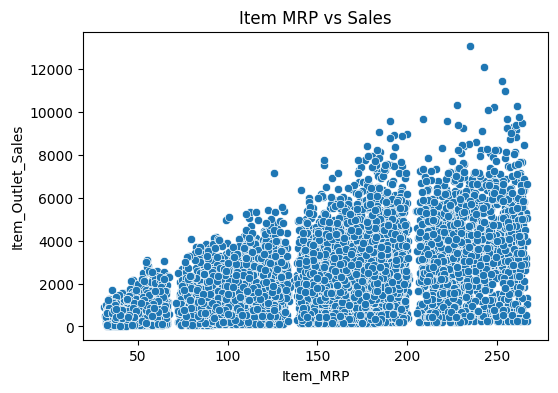

In [43]:
# Sales vs Item_MRP

plt.figure(figsize=(6,4))
sns.scatterplot(x=df['Item_MRP'], y=df['Item_Outlet_Sales'])
plt.title("Item MRP vs Sales")
plt.show()

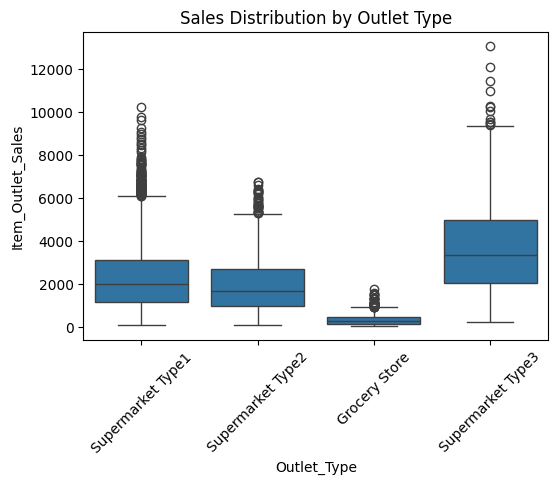

In [44]:
# Sales by Outlet Type

plt.figure(figsize=(6,4))
sns.boxplot(x=df['Outlet_Type'], y=df['Item_Outlet_Sales'])
plt.xticks(rotation=45)
plt.title("Sales Distribution by Outlet Type")
plt.show()


Step 3: Data Preprocessing

In [45]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


Handle Missing Values

In [46]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())


In [47]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])


In [48]:
df.isnull().sum()


,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [49]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
})


In [50]:
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']

In [51]:
X = pd.get_dummies(X, drop_first=True)

STEP 3: Importing  model libraries

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression

In [54]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [55]:
y_pred_lr = lr.predict(X_test)


In [56]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance:")
print("MAE:", mae_lr)
print("RMSE:", rmse_lr)
print("R² Score:", r2_lr)

Linear Regression Performance:
MAE: 944.6507312481835
RMSE: 1273.9189798632888
R² Score: 0.40291116992467846


Random Forest Regressor

In [57]:
rf = RandomForestRegressor(n_estimators=200,max_depth=15,min_samples_split=5,random_state=42,n_jobs=-1)

In [58]:
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [59]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("R² Score:", r2_rf)

Random Forest Performance:
MAE: 730.6094173639128
RMSE: 1049.7865822681335
R² Score: 0.5945312710224133


In [60]:
feature_importance = pd.Series(
    rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)
feature_importance.head(10)


,0
Item_MRP,0.457667
Outlet_Type_Supermarket Type1,0.122244
Outlet_Identifier_OUT027,0.074897
Outlet_Type_Supermarket Type3,0.062452
Outlet_Establishment_Year,0.032759
Outlet_Type_Supermarket Type2,0.027584
Item_Visibility,0.027250
Outlet_Identifier_OUT018,0.026798
Item_Weight,0.014582
Outlet_Identifier_OUT019,0.004433


visualization

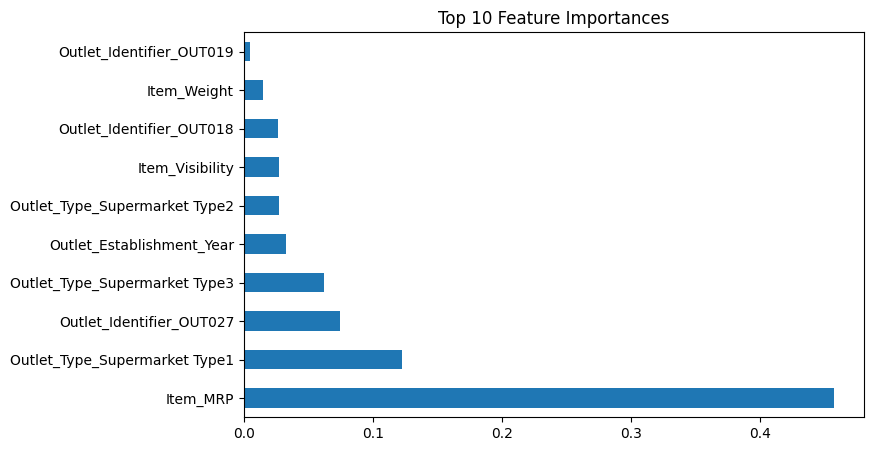

In [61]:
feature_importance.head(10).plot(kind='barh', figsize=(8,5))
plt.title("Top 10 Feature Importances")
plt.show()


actual vs predicted values

In [62]:
results = pd.DataFrame({
    'Actual_Sales': y_test.values[:10],
    'Predicted_Sales': y_pred_rf[:10]
})

results


,Actual_Sales,Predicted_Sales
0,1743.0644,1068.020680
1,356.8688,867.561885
2,377.5086,723.144388
3,5778.4782,4937.260986
4,2356.9320,2674.510422
5,865.5400,449.205345
6,4613.9940,5626.068176
7,2410.8618,1440.132255
8,1948.1308,1256.348928
9,1937.4780,2579.038855


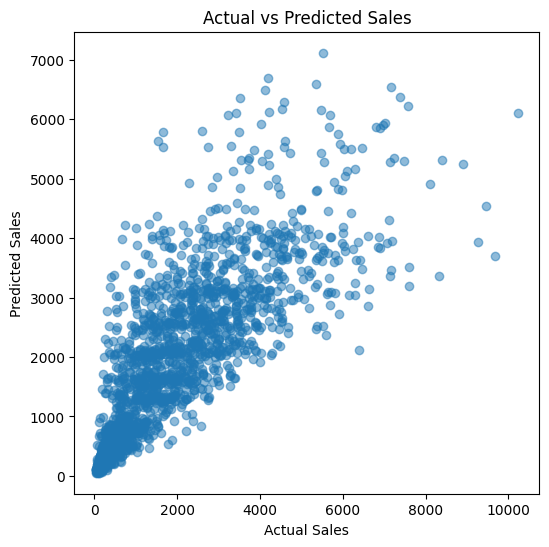

In [63]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()
